(ch-simpel-ikke-lineaer-regression)=
# Simpel ikke-lineær regression

Vi vil i dette kapitel undersøge, når en lineær model ikke er nok til at forklare sammenhængen mellem to variabler. Her vil vi se nyttigheden i at kigge på *log-transformeret* data, hvilket betyder, at vi tager logaritmen på vores observationer i data. Vi vil se, at hvis vi observerer en lineær sammenhæng i vores data, hvor vi kun log-transformerer $y$-værdierne, så vil en eksponentiel regressionsmodel være passende, hvorimod hvis vi log-transformerer både $x$-værdierne og $y$-værdierne, så vil en potens regressionsmodel være passende. Dette leder os naturligt ind på logaritmiske koordinatsystemer.

## Logaritmiske koordinatsystemer

Lad os starte med at huske, hvordan vi definerede en klasse af logaritmer $\log_a$ i Kapitel 1.xx

$$

    \log_a(a^x) = x,

$$

hvor $a$ er logaritmens grundtal. Så, tager man for eksempel $\log_{10}(100)$ fås 2, da $10^2 = 100$. Husk, $\ln(x) = \log_{\text{e}}(x)$. Vi vil i dette kapitel undertrykke logaritmens grundtal og bare skrive $\log$. 

Fra Kapitel x.xx (Eksponentialfunktionen) ved vi, at funktionen $\log(x)$ kun findes for $x>0$. Vi ved også, at $\log(x)\leq 0$ for $0<x\leq 1$, mens $\log(x)>0$ for $x>1$. Dette bliver vigtig i vores konstruktion af logaritmiske koordinatsystemer.

### Enkelt-logaritmisk koordinatsytem

I et enkelt-logaritmisk koordinatsystem er det kun den ene af de to akser, der log-transformeres. Lad os starte med at betragte hvad der sker, når vi log-transformerer vores $y$-akse. Husk, det er kun positive $y$-værdier, som vi kan log-transformere. Det vil derfor kun være muligt at betragte log-transformationen i første og anden kvadrant i et koordinatsystem.



In [259]:
from manim import *

In [97]:
%%manim -v WARNING -qm --format=mp4 SingleLogarithmicCoordinateSystemY

config.media_embed = True
config.media_width = "100%"

animat_green = "#aecc55"
animat_red   = "#cc5241"
animat_yellow= "#d9c750"
animat_blue  = "#6a90cc"

class SingleLogarithmicCoordinateSystemY(Scene):
    def construct(self):
        self.camera.background_color = WHITE

        # --------------------------------------------------------
        # (1) ALMINDELIGT PLANE + GRIDS + KVADRANT-POLYGONS
        # --------------------------------------------------------
        plane = NumberPlane(
            x_range=[-10, 10, 1],
            y_range=[-3,  7, 1],
            axis_config={
                "include_numbers": True,
                "include_tip": True,
                "color": BLACK
            },
            background_line_style={"stroke_opacity": 0.0},
        )
        # Gør akse-tal sorte
        plane.get_x_axis().numbers.set_color(BLACK)
        plane.get_y_axis().numbers.set_color(BLACK)

        # Ekstra lodrette gridlinjer
        custom_x_grid_lines = VGroup()
        for x in range(-10, 11, 1):
            grid_line = Line(
                start=plane.c2p(x, -8),
                end=plane.c2p(x,  8),
                stroke_color=GRAY,
                stroke_width=1,
                stroke_opacity=0.5,
            )
            custom_x_grid_lines.add(grid_line)

        # Ekstra vandrette gridlinjer
        custom_y_grid_lines = VGroup()
        for y in range(-5, 6, 1):
            grid_line = Line(
                start=plane.c2p(-10, y),
                end=plane.c2p( 10, y),
                stroke_color=GRAY,
                stroke_width=1,
                stroke_opacity=0.5,
            )
            custom_y_grid_lines.add(grid_line)

        # Labels på akserne
        x_label = plane.get_x_axis_label("x").set_color(BLACK).set_z_index(10)
        y_label = plane.get_y_axis_label("y").set_color(BLACK).set_z_index(10)

        # Set order
        plane.y_axis.set_z_index(10)
        plane.x_axis.set_z_index(10)

        # Kvadrant-polygoner
        quadrant1 = Polygon(
            plane.c2p(0,1),
            plane.c2p(10,1),
            plane.c2p(10,8),
            plane.c2p(0,8),
            fill_opacity=0.5, color=animat_green
        )
        quadrant2 = Polygon(
            plane.c2p(0,1),
            plane.c2p(-10,1),
            plane.c2p(-10,8),
            plane.c2p(0,8),
            fill_opacity=0.5, color=animat_yellow 
        )
        quadrant3 = Polygon(
            plane.c2p(0,1),
            plane.c2p(-10,1),
            plane.c2p(-10,0),
            plane.c2p(0,0),
            fill_opacity=0.5, color=animat_red 
        )
        quadrant4 = Polygon(
            plane.c2p(0,1),
            plane.c2p(10,1),
            plane.c2p(10,0),
            plane.c2p(0,0),
            fill_opacity=0.5, color=animat_blue 
        )
        quadrant5 = Polygon(
            plane.c2p(0,0),
            plane.c2p(8,0),
            plane.c2p(8,-2),
            plane.c2p(-8,-2),
            plane.c2p(-8,0),
            fill_opacity=0.9, color=BLACK
        )
        not_defined_txt = MathTex(r"\log(y)\text{ er ikke defineret her!}").move_to(quadrant5.get_center())
        not_defined_txt.set_z_index(10)

        # (1a) Tegn plane + grids + polygons
        self.play(
            Create(plane),
            Create(custom_x_grid_lines),
            Create(custom_y_grid_lines),
            Write(x_label),
            Write(y_label),
            run_time=2
        )
        self.play(Create(quadrant1))
        self.play(Create(quadrant2))
        self.play(Create(quadrant3))
        self.play(Create(quadrant4))
        self.wait(0.2)
        self.play(Create(quadrant5),Write(not_defined_txt))
        self.play(Indicate(not_defined_txt))
        self.wait(2)
        self.play(FadeOut(quadrant5),FadeOut(not_defined_txt))
        self.wait(2)

        # --------------------------------------------------------
        # (2) "FAKE LOG" PLANE med dobbelt-sidede Y-LABELS
        # --------------------------------------------------------
        #
        # Lad os ændre y_range til [-3,5], så vi har plads til 10^-3 ... 10^5
        # men stadig lineært i Manim. 
        plane_fake = NumberPlane(
            x_range=[-10, 10, 1],
            y_range=[ -4,  5, 1],
            x_axis_config={
                "include_tip": True,
                "color": BLACK,
                "include_numbers": True,
            },
            y_axis_config={
                "include_tip": True,
                "color": BLACK,
                "include_numbers": False,  # Vi sætter selv labels!
            },
            background_line_style={"stroke_opacity": 0.0},
        )
        plane_fake.get_x_axis().numbers.set_color(BLACK)

        plane_fake2 = NumberPlane(
            x_range=[-10, 10, 1],
            y_range=[ -4,  5, 1],
            axis_config={
                "include_tip": True,
                "color": BLACK,
                "include_numbers": False,  # Vi sætter selv labels!
            },
            background_line_style={"stroke_opacity": 0},
        )
        plane_fake2.axes.set_opacity(0)

        # x-akse: sæt nogle "almindelige" labels
        # x_labels_dict = {
        #     -10: MathTex("-10"),
        #     -9: MathTex("-9"),
        #     -8: MathTex("-8"),
        #     -7: MathTex("-7"),
        #     -6: MathTex("-6"),
        #     -5: MathTex("-5"),
        #     -4: MathTex("-4"),
        #     -3: MathTex("-3"),
        #     -2: MathTex("-2"),
        #     -1: MathTex("-1"),
        #     0: MathTex("0"),
        #     1: MathTex("1"),
        #     2: MathTex("2"),
        #     3: MathTex("3"),
        #     4: MathTex("4"),
        #     5: MathTex("5"),
        #     6: MathTex("6"),
        #     7: MathTex("7"),
        #     8: MathTex("8"),
        #     9: MathTex("9"),
        #     10: MathTex("10"),
        # }
        # plane_fake.x_axis.add_labels(x_labels_dict, direction=DOWN, buff=0.2)
        # for lbl in plane_fake.x_axis.labels:
        #     lbl.set_color(BLACK)

        # Y-akse: to sæt labels på hver sin side
        # (a) Venstre side: -3..5 som heltal
        left_labels_dict = {
            # -4: MathTex("0.0001"),
            -3: MathTex("-3"),
            -2: MathTex("-2"),
            -1: MathTex("-1"),
             0: MathTex("0"),
             1: MathTex("1"),
             2: MathTex("2"),
             3: MathTex("3"),
            # 4: MathTex("10000"),
            # 5: MathTex("100000"),
            # 5: MathTex("1000000"),
        }
        # (b) Højre side: -3..5 i "log-lignende" (10^-3..10^5)
        right_labels_dict = {
            # -4: MathTex(r"10^{-4}"),
            -3: MathTex(r"0{,}001"),
            -2: MathTex(r"0{,}01"),
            -1: MathTex(r"0{,}1"),
             0: MathTex(r"1"),
             1: MathTex(r"10"),
             2: MathTex(r"100"),
             3: MathTex(r"1000"),
            # 4: MathTex(r"10^{4}"),
            #  5: MathTex(r"10^{5}"),
            #  6: MathTex(r"10^{6}"),
        }

        plane_fake2.y_axis.add_labels(left_labels_dict, direction=LEFT, buff=0.2)
        plane_fake.y_axis.add_labels(right_labels_dict, direction=RIGHT, buff=0.2)

        # Gør dem sorte
        for lbl in plane_fake.y_axis.labels:
            lbl.set_color(BLACK)
        for lbl in plane_fake2.y_axis.labels:
            lbl.set_color(BLACK)

        # Aksel-overskrifter
        # x_label_fake = MathTex("x", color=BLACK).next_to(plane_fake.x_axis.get_right(), DOWN)
        x_label_fake = plane_fake.get_x_axis_label("x").set_color(BLACK).set_z_index(10)
        y_label_fake_right = plane_fake.get_y_axis_label("y", buff=-0.4).set_color(BLACK).set_z_index(10)
        y_label_fake_left = plane_fake2.get_y_axis_label("\log_{10}(y)", direction=LEFT, buff=0.4).set_color(BLACK).set_z_index(10)

        # y_label_fake_left = MathTex(r"\log_{10}(y)", color=BLACK, font_size=22).next_to(plane_fake.y_axis.get_top(), LEFT+2.5*DOWN)
        # y_label_fake_right = MathTex(r"y", color=BLACK, font_size=22).next_to(plane_fake.y_axis.get_top(), RIGHT+2.5*DOWN)
        
        # Set order
        plane_fake.y_axis.set_z_index(10)
        plane_fake.x_axis.set_z_index(10)
        plane_fake2.y_axis.set_z_index(10)
        plane_fake2.x_axis.set_z_index(10)

        # (2a) Gridlines for "fake log": major og minor
        custom_y_log_grid = VGroup()

        import math
        # For y_int i [-3..5]
        for y_int in range(-3, 7):
            # Major linje
            major_line = Line(
                start=plane_fake.c2p(-10, y_int),
                end=plane_fake.c2p( 10, y_int),
                stroke_color=GRAY,
                stroke_width=1,
                stroke_opacity=0.8,
            )
            custom_y_log_grid.add(major_line)

            # Minor-linjer for k=1..9 => y = y_int + log10(k)
            if y_int < 6:
                for k in range(1, 10):
                    minor_y = y_int + math.log10(k)  # ex: -3 + log10(2)
                    if minor_y <= 6:
                        minor_line = Line(
                            start=plane_fake.c2p(-10, minor_y),
                            end=plane_fake.c2p( 10, minor_y),
                            stroke_color=GRAY,
                            stroke_width=1,
                            stroke_opacity=0.4,
                        )
                        custom_y_log_grid.add(minor_line)

        # (2b) Vi må også definere nye polygons i "fake" plane,
        # så Transform() ved, hvor hjørnerne skal flyttes hen.
        quadrant1_fake = Polygon(
            plane_fake.c2p(0,  0),
            plane_fake.c2p(10, 0),
            plane_fake.c2p(10, 8),
            plane_fake.c2p(0,  8),
            fill_opacity=0.5, color=animat_green
        )
        quadrant2_fake = Polygon(
            plane_fake.c2p(0,  0),
            plane_fake.c2p(-10,0),
            plane_fake.c2p(-10,8),
            plane_fake.c2p(0,  8),
            fill_opacity=0.5, color=animat_yellow
        )
        quadrant3_fake = Polygon(
            plane_fake.c2p(0,  0),
            plane_fake.c2p(-10,0),
            plane_fake.c2p(-10,-5),
            plane_fake.c2p(0,  -5),
            fill_opacity=0.5, color=animat_red
        )
        quadrant4_fake = Polygon(
            plane_fake.c2p(0,  0),
            plane_fake.c2p(10, 0),
            plane_fake.c2p(10, -5),
            plane_fake.c2p(0,  -5),
            fill_opacity=0.5, color=animat_blue
        )

        # (2c) Animate transform: plane -> plane_fake
        self.play(
            FadeIn(plane_fake2),
            FadeIn(y_label_fake_left),
            Transform(plane, plane_fake),
            Transform(custom_y_grid_lines, custom_y_log_grid),  # transform de eksisterende vandrette linjer til "log-linjer"
            Transform(y_label, y_label_fake_right),
            Transform(x_label, x_label_fake),
            Transform(quadrant1, quadrant1_fake),
            Transform(quadrant2, quadrant2_fake),
            Transform(quadrant3, quadrant3_fake),
            Transform(quadrant4, quadrant4_fake),
            run_time=3
        )
        self.wait(4)


Med log-transformationen ses tydeligt, hvordan de farvede områder mappes over i det enkelt-logaritmiske koordinatsystem. I ovenstående videoeksempel bruges 10-tals logaritmen. Vi kunne have brugt et hvilket som helst grundtal. 

| Område         | Almindeligt koordinatsystem    | Enkelt-logaritmisk koordinatsystem    |
| -------------- | ------------------------------ | ------------------------------------- |
| Grønt          | $x \geq 0, y \geq 1$           | $x \geq 0, \log(y) \geq 0$            |
| Gult           | $x \leq 0, y \geq 1$           | $x \leq 0, \log(y) \geq 0$            |
| Rødt           | $x \leq 0, 0 < y \leq 1$       | $x \leq 0, \log(y) \leq 0$            |
| Blåt           | $x \geq 0, 0 < y \leq 1$       | $x \geq 0, \log(y) \leq 0$            |

Et enkelt-logaritmisk koordinatsystem kan selvfølgelig også være med log-transformeret $x$-værdier. Her vil det være første og fjerde kvadrant, der kan log-transformeres, da det er i disse kvadranter, at vi har positive $x$-værdier.

### Dobbelt-logaritmisk koordinatsystem

I et dobbelt-logaritmisk koordinatsystem er det begge akser, der log-transformeres. Vi kan i dette tilfælde kun log-transformere positive $x$- og $y$-værdier. Det vil derfor kun være muligt at betragte log-transformationen i første kvadrant i koordinatsystemet.


In [96]:
%%manim -v WARNING -qm --format=mp4 DoubleLogarithmicCoordinateSystemXY

config.media_embed = True
config.media_width = "100%"

animat_green = "#aecc55"
animat_red   = "#cc5241"
animat_yellow= "#d9c750"
animat_blue  = "#6a90cc"

class DoubleLogarithmicCoordinateSystemXY(Scene):
    def construct(self):
        self.camera.background_color = WHITE

        # --------------------------------------------------------
        # (1) ALMINDELIGT PLANE + GRIDS + KVADRANT-POLYGONS
        # --------------------------------------------------------
        plane = NumberPlane(
            x_range=[-5, 15, 1],
            y_range=[-3,  7, 1],
            axis_config={
                "include_numbers": True,
                "include_tip": True,
                "color": BLACK
            },
            background_line_style={"stroke_opacity": 0.0},
        )
        # Gør akse-tal sorte
        plane.get_x_axis().numbers.set_color(BLACK)
        plane.get_y_axis().numbers.set_color(BLACK)

        # Ekstra lodrette gridlinjer
        custom_x_grid_lines = VGroup()
        for x in range(-5, 15, 1):
            grid_line = Line(
                start=plane.c2p(x, -8),
                end=plane.c2p(x,  8),
                stroke_color=GRAY,
                stroke_width=1,
                stroke_opacity=0.5,
            )
            custom_x_grid_lines.add(grid_line)

        # Ekstra vandrette gridlinjer
        custom_y_grid_lines = VGroup()
        for y in range(-3, 7, 1):
            grid_line = Line(
                start=plane.c2p(-15, y),
                end=plane.c2p( 15, y),
                stroke_color=GRAY,
                stroke_width=1,
                stroke_opacity=0.5,
            )
            custom_y_grid_lines.add(grid_line)

        # Labels på akserne
        x_label = plane.get_x_axis_label("x").set_color(BLACK).set_z_index(10)
        y_label = plane.get_y_axis_label("y").set_color(BLACK).set_z_index(10)

        # Set order
        plane.y_axis.set_z_index(10)
        plane.x_axis.set_z_index(10)

        # Kvadrant-polygoner
        quadrant1 = Polygon(
            plane.c2p(1,1),
            plane.c2p(15,1),
            plane.c2p(15,8),
            plane.c2p(1,8),
            fill_opacity=0.5, color=animat_green
        )
        quadrant2 = Polygon(
            plane.c2p(1,1),
            plane.c2p(0,1),
            plane.c2p(0,8),
            plane.c2p(1,8),
            fill_opacity=0.5, color=animat_yellow 
        )
        quadrant3 = Polygon(
            plane.c2p(1,1),
            plane.c2p(0,1),
            plane.c2p(0,0),
            plane.c2p(1,0),
            fill_opacity=0.5, color=animat_red 
        )
        quadrant4 = Polygon(
            plane.c2p(1,1),
            plane.c2p(15,1),
            plane.c2p(15,0),
            plane.c2p(1,0),
            fill_opacity=0.5, color=animat_blue 
        )
        quadrant5 = Polygon(
            plane.c2p(0,0),
            plane.c2p(15,0),
            plane.c2p(15,-4),
            plane.c2p(-4,-4),
            plane.c2p(-4,8),
            plane.c2p(0,8),
            fill_opacity=0.9, color=BLACK
        )
        not_defined_txt = MathTex(r"\log(x)\text{ og }\log(y)\text{ er ikke defineret her!}").move_to(quadrant5.get_center()+3*DOWN)
        not_defined_txt.set_z_index(10)

        # (1a) Tegn plane + grids + polygons
        self.play(
            Create(plane),
            Create(custom_x_grid_lines),
            Create(custom_y_grid_lines),
            Write(x_label),
            Write(y_label),
            run_time=2
        )
        self.play(Create(quadrant1))
        self.play(Create(quadrant2))
        self.play(Create(quadrant3))
        self.play(Create(quadrant4))
        self.wait(0.2)
        self.play(Create(quadrant5),Write(not_defined_txt))
        self.play(Indicate(not_defined_txt))
        self.wait(2)
        self.play(FadeOut(quadrant5),FadeOut(not_defined_txt))
        self.wait(2)

        # --------------------------------------------------------
        # (2) "FAKE LOG" PLANE med dobbelt-sidede Y-LABELS
        # --------------------------------------------------------
        #
        # Lad os ændre y_range til [-3,5], så vi har plads til 10^-3 ... 10^5
        # men stadig lineært i Manim. 
        plane_fake = NumberPlane(
            x_range=[-4,  4, 1],
            y_range=[ -4,  5, 1],
            x_length=config.frame_width,
            x_axis_config={
                "color": None,
                "include_numbers": False,
            },
            y_axis_config={
                "include_tip": True,
                "color": None,
                "include_numbers": False,  # Vi sætter selv labels!
            },
            background_line_style={"stroke_opacity": 0.0},
        )

        plane_fake2 = NumberPlane(
            x_range=[-4,  4, 1],
            y_range=[ -4,  5, 1],
            x_length=config.frame_width,
            axis_config={
                "color": None,
                "include_numbers": False,  # Vi sætter selv labels!
            },
            background_line_style={"stroke_opacity": 0},
        )
        plane_fake2.axes.set_opacity(0)

        # x-akse: sæt nogle "almindelige" labels
        up_labels_dict = {
            -4: MathTex("-4"),
            -3: MathTex("-3"),
            -2: MathTex("-2"),
            -1: MathTex("-1"),
            #0: MathTex("0"),
            1: MathTex("1"),
            2: MathTex("2"),
            #3: MathTex("3"),
        }

        down_labels_dict = {
            -4: MathTex("0{,}0001"),
            -3: MathTex("0{,}001"),
            -2: MathTex("0{,}01"),
            -1: MathTex("0{,}1"),
            #0: MathTex("0"),
            1: MathTex("10"),
            2: MathTex("100"),
            3: MathTex("1000"),
        }

        plane_fake.x_axis.add_labels(up_labels_dict, direction=UP, buff=0.2)
        plane_fake2.x_axis.add_labels(down_labels_dict, direction=DOWN, buff=0.2)

        for lbl in plane_fake.x_axis.labels:
            lbl.set_color(BLACK)
        for lbl in plane_fake2.x_axis.labels:
            lbl.set_color(BLACK)

        # Y-akse: to sæt labels på hver sin side
        # (a) Venstre side: -3..5 som heltal
        left_labels_dict = {
            -3: MathTex("-3"),
            -2: MathTex("-2"),
            -1: MathTex("-1"),
             0: MathTex("0"),
             1: MathTex("1"),
             2: MathTex("2"),
             3: MathTex("3"),
        }
        # (b) Højre side: -3..5 i "log-lignende" (10^-3..10^5)
        right_labels_dict = {
            -3: MathTex(r"0{,}001"),
            -2: MathTex(r"0{,}01"),
            -1: MathTex(r"0{,}1"),
             0: MathTex(r"1"),
             1: MathTex(r"10"),
             2: MathTex(r"100"),
             3: MathTex(r"1000"),
        }

        plane_fake.y_axis.add_labels(right_labels_dict, direction=RIGHT, buff=0.2)
        plane_fake2.y_axis.add_labels(left_labels_dict, direction=LEFT, buff=0.2)

        # Gør dem sorte
        for lbl in plane_fake.y_axis.labels:
            lbl.set_color(BLACK)
        for lbl in plane_fake2.y_axis.labels:
            lbl.set_color(BLACK)

        # Aksel-overskrifter
        x_label_fake_up = plane_fake.get_x_axis_label("\log_{10}(x)", buff=-0.1).set_color(BLACK).set_z_index(10)
        x_label_fake_down = plane_fake2.get_x_axis_label("x", direction=DOWN).set_color(BLACK).set_z_index(10)

        y_label_fake_right = plane_fake.get_y_axis_label("y", buff=-0.4).set_color(BLACK).set_z_index(10)
        y_label_fake_left = plane_fake2.get_y_axis_label("\log_{10}(y)", direction=LEFT, buff=0.4).set_color(BLACK).set_z_index(10)
        
        # Set order
        plane_fake.y_axis.set_z_index(10)
        plane_fake.x_axis.set_z_index(10)
        plane_fake2.y_axis.set_z_index(10)
        plane_fake2.x_axis.set_z_index(10)

        # (2a) Gridlines for "fake log": major og minor
        import math

        # Antag, at plane_fake er et NumberPlane med x_range=[-3,6], y_range=[-3,7], f.eks.
        custom_x_log_grid = VGroup()
        custom_y_log_grid = VGroup()

        # 1) "Fake log" for Y-aksel (som du allerede har):
        for y_int in range(-5, 7):
            # Major line (heltal)
            major_line = Line(
                start=plane_fake.c2p(-5, y_int),
                end=plane_fake.c2p( 6, y_int),
                stroke_color=GRAY,
                stroke_width=1,
                stroke_opacity=0.8,
            )
            custom_y_log_grid.add(major_line)

            # Minor-linjer mellem y_int og y_int+1
            if y_int < 6:
                for k in range(1, 10):
                    minor_y = y_int + math.log10(k)
                    if minor_y <= 6:
                        minor_line = Line(
                            start=plane_fake.c2p(-5, minor_y),
                            end=plane_fake.c2p( 6, minor_y),
                            stroke_color=GRAY,
                            stroke_width=1,
                            stroke_opacity=0.4,
                        )
                        custom_y_log_grid.add(minor_line)

        # 2) "Fake log" for X-aksel (NYT): 
        for x_int in range(-4, 4):
            # Major line (heltal)
            major_line = Line(
                start=plane_fake.c2p(x_int, -4),
                end=plane_fake.c2p(x_int,  7),
                stroke_color=GRAY,
                stroke_width=1,
                stroke_opacity=0.8,
            )
            custom_x_log_grid.add(major_line)

            # Minor-linjer mellem x_int og x_int+1
            if x_int < 6:
                for k in range(1, 10):
                    minor_x = x_int + math.log10(k)
                    if minor_x <= 6:
                        minor_line = Line(
                            start=plane_fake.c2p(minor_x, -4),
                            end=plane_fake.c2p(minor_x,  7),
                            stroke_color=GRAY,
                            stroke_width=1,
                            stroke_opacity=0.4,
                        )
                        custom_x_log_grid.add(minor_line)

        # (2b) Vi må også definere nye polygons i "fake" plane,
        # så Transform() ved, hvor hjørnerne skal flyttes hen.
        quadrant1_fake = Polygon(
            plane_fake.c2p(0,  0),
            plane_fake.c2p(10, 0),
            plane_fake.c2p(10, 8),
            plane_fake.c2p(0,  8),
            fill_opacity=0.5, color=animat_green
        )
        quadrant2_fake = Polygon(
            plane_fake.c2p(0,  0),
            plane_fake.c2p(-10,0),
            plane_fake.c2p(-10,8),
            plane_fake.c2p(0,  8),
            fill_opacity=0.5, color=animat_yellow
        )
        quadrant3_fake = Polygon(
            plane_fake.c2p(0,  0),
            plane_fake.c2p(-10,0),
            plane_fake.c2p(-10,-5),
            plane_fake.c2p(0,  -5),
            fill_opacity=0.5, color=animat_red
        )
        quadrant4_fake = Polygon(
            plane_fake.c2p(0,  0),
            plane_fake.c2p(10, 0),
            plane_fake.c2p(10, -5),
            plane_fake.c2p(0,  -5),
            fill_opacity=0.5, color=animat_blue
        )

        # (2c) Animate transform: plane -> plane_fake
        self.play(
            FadeIn(plane_fake2),
            FadeIn(y_label_fake_left),
            FadeIn(x_label_fake_up),
            Transform(plane, plane_fake),
            Transform(custom_x_grid_lines, custom_x_log_grid),  
            Transform(custom_y_grid_lines, custom_y_log_grid), 
            Transform(y_label, y_label_fake_right),
            Transform(x_label, x_label_fake_down),
            Transform(quadrant1, quadrant1_fake),
            Transform(quadrant2, quadrant2_fake),
            Transform(quadrant3, quadrant3_fake),
            Transform(quadrant4, quadrant4_fake),
            run_time=3
        )
        self.wait(4)


Igen ses det tydeligt, hvordan de farvede områder mappes over i det dobbelt-logaritmiske koordinatsystem. 

| Område         | Almindeligt koordinatsystem    | Dobbelt-logaritmisk koordinatsystem    |
| -------------- | ------------------------------ | ------------------------------------- |
| Grønt          | $x \geq 1, y \geq 1$           | $\log(x) \geq 0, \log(y) \geq 0$            |
| Gult           | $0 < x \leq 1, y \geq 1$       | $\log(x) \leq 0, \log(y) \geq 0$            |
| Rødt           | $0 < x \leq 1, 0 < y \leq 1$   | $\log(x) \leq 0, \log(y) \leq 0$            |
| Blåt           | $x \geq 1, 0 < y \leq 1$       | $\log(x) \geq 0, \log(y) \leq 0$            |

Et enkelt-logaritmisk koordinatsystem kan selvfølgelig også være med log-transformeret $x$-værdier. Her vil det være første og fjerde kvadrant, der kan log-transformeres, da det er i disse kvadranter, at vi har positive $x$-værdier.

## Simpel eksponentiel regression

Skal vi fitte en eksponentiel regression på vores data, så vil den fittede kurve have formen

$$

    f(x) = ba^x,

$$

hvor $a>0$ og $b>0$. For at finde den kurve, der bedst gennemskærer vores punkter, så kan vi også bruge mindste kvadraters metode her. Vi kan dog lette beregningen ved at indse, at vi kan bruge en lineær model på log-transformerede $y$-værdier. Husk, det betyder, at vi i stedet for at kigge på datapunkterne $y_i$, så kigger vi på $\log(y_i)$. Vi bemærker, at

$$
\begin{align*}
    \log(f(x)) &= \log(ba^x) \\
        &= \log(b) + \log(a^x) \\
        &= \underbrace{\log(b)}_{=\beta_0} + \underbrace{\log(a)}_{=\beta_1} x. \\
\end{align*}
$$

Her ses det nu tydeligt, at $\tilde{y}=\log(f(x))$ er en lineær model af $x$

$$

    \tilde{y} = \beta_0 + \beta_1 x,

$$

hvor $\beta_0 = \log(b)$ og $\beta_1 = \log(a)$. Vi kan derfor bruges vores metoder fra den simple lineære regressionsmodel på datasættet med log-transformerede $y$-værdier:

$$

    (x_1,\log(y_1)),(x_2,\log(y_2)),\dots,(x_n,\log(y_n)).

$$

Dette svarer også til at betragte vores originale data i et enkelt-logaritmisk koordinatsystem, hvor $y$-aksen er log-transformeret. Skulle vi i et sådan koordinatsystem se en lineær tendens, så kunne det være en indikator for, at en simpel eksponentiel regressionsmodel vil være oplagt til at beskrive sammenhængen mellem de to variabler. 

Når vi har bestemt den rette linje, der bedst gennemskærer disse punkter, så kan vi bruge relationerne:

$$
\begin{align*}
    \beta_0 &= \log(b) \\
    \beta_1 &= \log(a).
\end{align*}
$$

Arbejder vi med 10-tals-logaritmen, da ville vores originale modelparametre $a$ og $b$ være:

$$
\begin{align*}
    \beta_0 &= \log_{10}(b) &\Leftrightarrow && b &= 10^{\beta_0} \\
    \beta_1 &= \log_{10}(a) &\Leftrightarrow && a &= 10^{\beta_1}.
\end{align*}
$$

Indsætter vi disse i vores originale forskrift, vil vi få vores eksponentielle regressionsmodel

$$

    f(x) = ba^x.

$$

````{prf:eksempel}
:label: ex-eksponentiel-regression

Vi ønsker at modellere befolkningsvæksten i en by, hvor vi har følgende data over tid:

| År        | Befolkning      |
| --------- | --------------- |
| 0         | 500             |
| 1         | 751             |
| 2         | 1152            |
| 3         | 1732            |
| 4         | 2681            |

Når vi indsætter ovenstående data i et almindeligt koordinatsystem, bliver det tydeligt, at en lineær regression direkte på data ikke giver mening. Betragter vi data i et enkelt-logaritmisk koordinatsystem, hvor $y$-aksen er log-transformeret, da ses tydelig en lineær tendens. 

```{glue:figure} eks1
```

Det giver derfor mening at fitte en eksponentiel model på den oprindelige data $(x_i,y_i)$ - eller snarere, en lineær model på vores log-transformeret data $(x_i,\log_{10}(y_i))$. Vi husker, at denne har formen

$$

    \tilde{y} = \beta_0 + \beta_1 x,

$$

hvor $\tilde{y} = \log_{10}(y)$. Ved brug af mindste kvadraters metode, finder vi

$$

    \beta_0 \approx 2{,}721, \qquad \beta_1 \approx 0{,}174.

$$

Med disse parametre kan vi finde de oprindelige parametre $b$ og $a$:

$$

    b = 10^{\beta_0} \approx 10^{2{,}721} \approx 526{,}017,\qquad a = 10^{\beta_1} \approx 10^{0{,}174} \approx 1{,}493.

$$

Dette giver os den eksponentielle model

$$

    f(x) = 526{,}017 \cdot 1{,}493^x

$$

for vores oprindelige data. Nedenfor ses den fittede kurve indsat på vores oprindelige data:

```{glue:figure} eks1-2
```

Vi kan nu bruge modellen til at forudsige befolkningen i fremtiden. Med modellen får vi, at befolkningen vil være ca. 5.821 efter seks år:

$$

    f(6) = 526{,}017 \cdot 1{,}493^6 \approx 5821.

$$

````

### Eulers konstant som grundtal

I {numref}`Kapitel %s<ch-eksponentialfunktionen>` lærte vi om Eulers konstant $\text{e}$, der sammen med den naturlige logaritme $\ln
$, danner basis for nogle helt særlige funktioner. Oftest, når matematikere snakker om eksponentialfunktionen, så vil $\text{e}$ være grundtallet. Det viser sig i mellemtiden, at vi ret nemt kan gå mellem den generelle eksponentialfunktion, $f(x)=ba^x$, hvor $a>0$, og eksponentialfunktionen med $\text{e}$ som grundtal. 

Lader vi $a=\text{e}^k$, hvor $k\in\mathbb{R}$, så kan vi altid omskrive den generelle eksponentialfunktion til en med $\text{e}$ som grundtal. Husk, at funktionen $f(x)=\text{e}^x>0$ for alle $x\in\mathbb{R}$. Derfor er identiteten $a=\text{e}^k$ valid. Indsætter vi $a=\text{e}^k$ i $f(x)=ba^x$ fås:

$$

    f(x)=b(\text{e}^k)^x = b\text{e}^{kx}.

$$

Det betyder, at alle eksponentielle modeller på formen $f(x)=ba^x$ kan skrives på formen $f(x)=b\text{e}^{kx}$. Vi bestemmer $k$ ved at løse for denne i ligningen $a=\text{e}^k$:

$$

    k = \ln(a).

$$

Fra {prf:ref}`ex-eksponentiel-regression` kan vi omskrive den fittede eksponentialfunktion til $f(x) = 526{,}017 \text{e}^{0{,}401x}$, da $\ln(1{,}493) = 0{,}401$. 



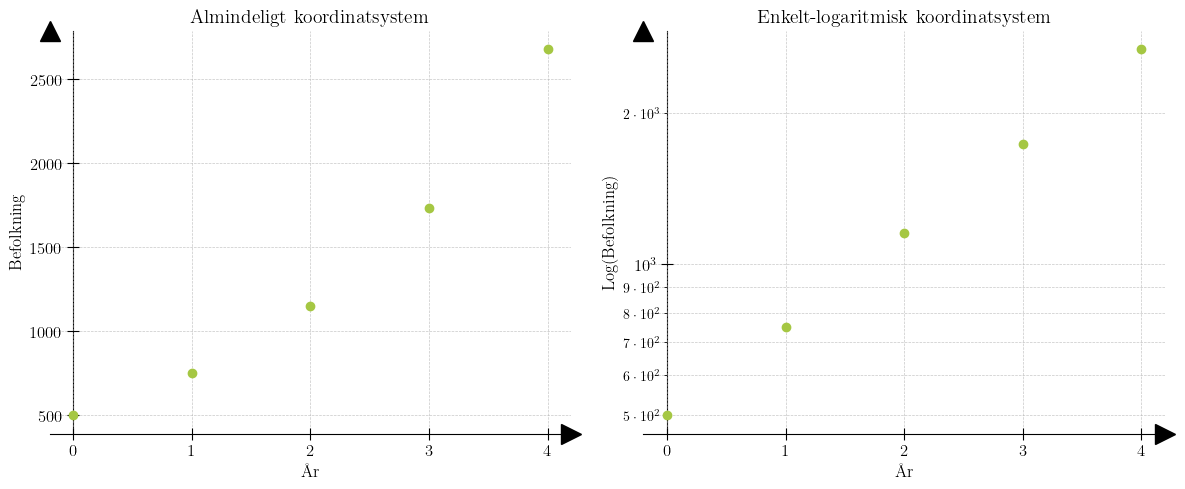

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, FuncFormatter
from myst_nb import glue

# Data med tydeligere eksponentiel vækst
df = pd.DataFrame({
    'År': [0, 1, 2, 3, 4],
    'Befolkning': [500, 751, 1152, 1732, 2681]
})

# Initialize plot mimicking manim/TikZ
# Enable LaTeX for all text
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Create figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Ensure axes and gridlines are in the background
axes[0].set_axisbelow(True)
axes[0].spines['left'].set_zorder(0)  
axes[0].spines['bottom'].set_zorder(0)  
axes[1].set_axisbelow(True)
axes[1].spines['left'].set_zorder(0)  
axes[1].spines['bottom'].set_zorder(0)  

# Original scale plot
axes[0].scatter(x=df['År'], y=df['Befolkning'], color='#a5c743')
axes[0].spines[['top', 'right']].set_visible(False)
axes[0].plot(1, 0, ">k", transform=axes[0].transAxes, clip_on=False, markersize=15)
axes[0].plot(0, 1, "^k", transform=axes[0].transAxes, clip_on=False, markersize=15)
axes[0].spines[['left']].set_position('zero')
axes[0].tick_params(direction='inout', length=8, labelsize=12)
axes[0].set_xticks([0, 1, 2, 3, 4])  # Kun labels for 0-4
axes[0].set_xlabel('År', fontsize=12)
axes[0].set_ylabel('Befolkning', fontsize=12)
axes[0].set_title('Almindeligt koordinatsystem', fontsize=14)
axes[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  # Tilføj gridlines

# Log-transformed y-axis plot
axes[1].scatter(x=df['År'], y=df['Befolkning'], color='#a5c743')
axes[1].spines[['top', 'right']].set_visible(False)
axes[1].plot(1, 0, ">k", transform=axes[1].transAxes, clip_on=False, markersize=15)
axes[1].plot(0, 1, "^k", transform=axes[1].transAxes, clip_on=False, markersize=15)
axes[1].spines[['left']].set_position('zero')
axes[1].tick_params(direction='inout', length=8, labelsize=12)
axes[1].set_xticks([0, 1, 2, 3, 4])  # Kun labels for 0-4
axes[1].set_xlabel('År', fontsize=12)
axes[1].set_ylabel('Log(Befolkning)', fontsize=12)
axes[1].set_yscale('log')
axes[1].set_title('Enkelt-logaritmisk koordinatsystem', fontsize=14)

# Add repeated gridlines for all 10^a levels
axes[1].yaxis.set_major_locator(LogLocator(base=10.0, numticks=10))  # Major ticks ved 10^a
axes[1].yaxis.set_minor_locator(LogLocator(base=10.0, subs=[1, 2, 3, 4, 5, 6, 7, 8, 9], numticks=100))  # Minor ticks ved mellemrum
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)  # Gridlines for både major og minor ticks

# Custom formatter for y-axis
def log_tick_formatter(val, pos):
    if val < 1:
        return ""  # Ignore values below 1
    exponent = int(np.log10(val))
    base = int(val / (10**exponent))
    if base == 1:
        return f"$10^{exponent}$"
    return f"${base} \\cdot 10^{exponent}$"

axes[1].yaxis.set_major_formatter(FuncFormatter(log_tick_formatter))
axes[1].yaxis.set_minor_formatter(FuncFormatter(log_tick_formatter))
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)  # Gridlines for both major and minor ticks

# Adjust layout
plt.tight_layout()

# Glue figure for myst_nb
glue('eks1', fig, display=False)


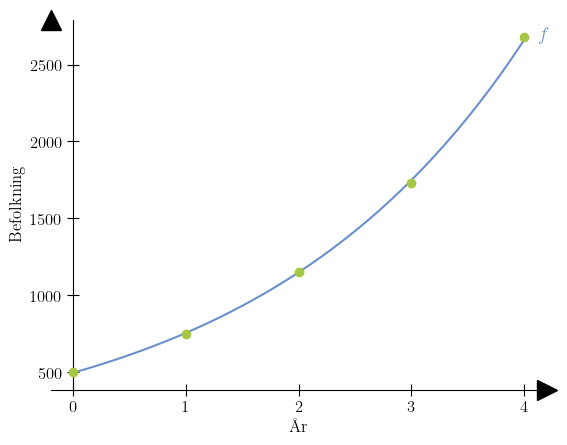

In [44]:
# Data med tydeligere eksponentiel vækst
df = pd.DataFrame({
    'År': [0, 1, 2, 3, 4],
    'Befolkning': [500, 751, 1152, 1732, 2681]
})

# Beregn eksponentiel regression: y = b * a^x
x = df['År']
y = df['Befolkning']
log_y = np.log(y)  # Log-transformer y for lineær regression
coefficients = np.polyfit(x, log_y, 1)  # Fitter en lineær model på log-transformerede data
a = np.exp(coefficients[0])  # Omregn hældningen til a
b = np.exp(coefficients[1])  # Omregn skæringspunktet til b

# Fit funktion: y = b * a^x
x_cont = np.arange(0, 4.1, 0.1)
fitted_y = b * a**x_cont

# Initialize plot mimicking manim/TikZ
# Enable LaTeX for all text
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Create figure
fig, ax = plt.subplots()

# Ensure axes and gridlines are in the background
ax.set_axisbelow(True)
ax.spines['left'].set_zorder(0)  # Place y-axis spine in the background
ax.spines['bottom'].set_zorder(0)  # Place x-axis spine in the background

# Original scale plot
ax.scatter(x=df['År'], y=df['Befolkning'], color='#a5c743', zorder=2)
ax.plot(x_cont, fitted_y, color='#6a90cc', zorder=1)

# Add 'f' annotation at the end of the fitted curve
ax.annotate(
    r"$f$",  # Label
    xy=(x.iloc[-1], fitted_y[-1]),  # Position: last x and fitted y
    xytext=(10,0),  # Offset for the text
    textcoords='offset points',
    color='#6a90cc',
    fontsize=14
)

ax.spines[['top', 'right']].set_visible(False)
ax.plot(1, 0, ">k", transform=ax.transAxes, clip_on=False, markersize=15)
ax.plot(0, 1, "^k", transform=ax.transAxes, clip_on=False, markersize=15)
ax.spines[['left']].set_position('zero')
ax.tick_params(direction='inout', length=8, labelsize=12)
ax.set_xticks([0, 1, 2, 3, 4])  # Kun labels for 0-4
ax.set_xlabel('År', fontsize=12)
ax.set_ylabel('Befolkning', fontsize=12)

# Adjust layout
#plt.tight_layout()

# Glue figure for myst_nb
glue('eks1-2', fig, display=False)


## Simpel potens regression

Skal vi fitte en potens regression på vores data, så vil den fittede kurve have formen

$$

    f(x) = bx^a

$$

For at finde den kurve, der bedst gennemskærer vores punkter, så kan vi også bruge mindste kvadraters metode her. Igen kan vi lette beregningen ved at indse, at vi kan bruge en lineær model på log-transformerede $x$- og $y$-værdier. Vi bemærker, at

$$
\begin{align*}
    \log(f(x)) &= \log(bx^a) \\
        &= \log(b) + \log(x^a) \\
        &= \underbrace{\log(b)}_{=\beta_0} + \underbrace{a}_{=\beta_1}\underbrace{\log(x)}_{\tilde{x}}. \\
\end{align*}
$$

Her ses det nu tydeligt, at $\tilde{y}=\log(f(x))$ er en lineær model af $\tilde{x}$

$$

    \tilde{y} = \beta_0 + \beta_1 \tilde{x},

$$

hvor $\beta_0 = \log(b)$ og $\beta_1 = a$. Vi kan derfor bruges vores metoder fra den simple lineære regressionsmodel på datasættet:

$$

    (\log(x_1),\log(y_1)),(\log(x_2),\log(y_2)),\dots,(\log(x_n),\log(y_n)).

$$

Dette svarer også til at betragte vores originale data i et dobbelt-logaritmisk koordinatsystem. Skulle vi i et sådan koordinatsystem se en lineær tendens, så kunne det være en indikator for, at en simpel potens regressionsmodel vil være oplagt til at beskrive sammenhængen mellem de to variabler. 

Når vi har bestemt den rette linje, der bedst gennemskærer disse punkter, så kan vi bruge relationerne:

$$
\begin{align*}
    \beta_0 &= \log(b) \\
    \beta_1 &= a.
\end{align*}
$$

Arbejder vi med 10-tals-logaritmen, da ville vores originale modelparametre $a$ og $b$ være:

$$
\begin{align*}
    \beta_0 &= \log_{10}(b) &\Leftrightarrow && b &= 10^{\beta_0} \\
    \beta_1 &= a 
\end{align*}
$$

Indsætter vi disse i vores originale forskrift, vil vi få vores eksponentielle regressionsmodel

$$

    f(x) = bx^a.

$$

````{prf:eksempel}
:label: ex-potens-regression

Vi undersøger sammenhængen mellem længden af en tom ballon og den maksimale mængde vand, den kan indeholde, inden den springer. Vi har målt følgende værdier:

| Længde (cm) | Vandmængde (mL)    |
| ----------- | ------------------ |
| 5           | 71                 |
| 10          | 308                |
| 15          | 736                |
| 20          | 1360               |
| 30          | 3224               |
| 30          | 9557               |

Når vi indsætter ovenstående data i et almindeligt koordinatsystem, bliver det tydeligt, at en lineær regression direkte på data ikke giver mening. Betragter vi data i et dobbelt-logaritmisk koordinatsystem, hvor både $x$- og $y$-aksen er log-transformeret, da ses tydelig en lineær tendens. 

```{glue:figure} eks2
```

Det giver derfor mening at fitte en potens model på den oprindelige data $(x_i,y_i)$ - eller snarere, en lineær model på vores log-transformeret data $(\log_{10}(x_i),\log_{10}(y_i))$. Vi husker, at denne har formen

$$

    \tilde{y} = \beta_0 + \beta_1 \tilde{x},

$$

hvor $\tilde{x} = \log_{10}(x)$ og $\tilde{y} = \log_{10}(y)$. Ved brug af mindste kvadraters metode, finder vi

$$

    \beta_0 \approx 0{,}360, \qquad \beta_1 \approx 2{,}131.

$$

Med disse parametre kan vi finde de oprindelige parametre $b$ og $a$:

$$

    b = 10^{\beta_0} \approx 10^{0{,}360} \approx 2{,}295,\qquad a = \beta_1 \approx 2{,}131.

$$

Dette giver os potens modellen

$$

    f(x) = 2{,}295 x^{2{,}131}

$$

for vores oprindelige data. Nedenfor ses den fittede kurve indsat på vores oprindelige data:

```{glue:figure} eks2-2
```

Inden vi slutter ovenstående eksempel, så tænk lige over hvilke forudsætninger, der skal til for at lave et sådant eksperiment.

````



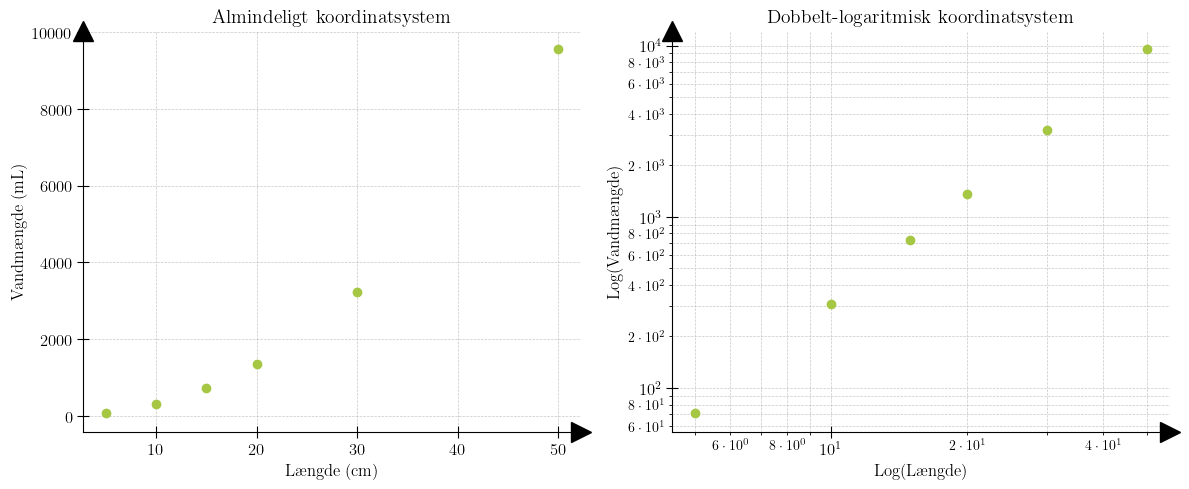

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, FuncFormatter
from myst_nb import glue

# Data med tydeligere eksponentiel vækst
df = pd.DataFrame({
    'Længde': [5, 10, 15, 20, 30, 50],
    'Vandmængde': [71, 308, 736, 1360, 3224, 9557]
})

# Initialize plot mimicking manim/TikZ
# Enable LaTeX for all text
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Create figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Ensure axes and gridlines are in the background
axes[0].set_axisbelow(True)
axes[0].spines['left'].set_zorder(0)  
axes[0].spines['bottom'].set_zorder(0)  
axes[1].set_axisbelow(True)
axes[1].spines['left'].set_zorder(0)  
axes[1].spines['bottom'].set_zorder(0)  

# Original scale plot
axes[0].scatter(x=df['Længde'], y=df['Vandmængde'], color='#a5c743')
axes[0].spines[['top', 'right']].set_visible(False)
axes[0].plot(1, 0, ">k", transform=axes[0].transAxes, clip_on=False, markersize=15)
axes[0].plot(0, 1, "^k", transform=axes[0].transAxes, clip_on=False, markersize=15)
#axes[0].spines[['left']].set_position('zero')
axes[0].tick_params(direction='inout', length=8, labelsize=12)
axes[0].set_xlabel('Længde (cm)', fontsize=12)
axes[0].set_ylabel('Vandmængde (mL)', fontsize=12)
axes[0].set_title('Almindeligt koordinatsystem', fontsize=14)
axes[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  # Tilføj gridlines

# Log-transformed y-axis plot
axes[1].scatter(x=df['Længde'], y=df['Vandmængde'], color='#a5c743')
axes[1].spines[['top', 'right']].set_visible(False)
axes[1].plot(1, 0, ">k", transform=axes[1].transAxes, clip_on=False, markersize=15)
axes[1].plot(0, 1, "^k", transform=axes[1].transAxes, clip_on=False, markersize=15)
#axes[1].spines[['left']].set_position('zero')
axes[1].tick_params(direction='inout', length=8, labelsize=12)
axes[1].set_xlabel('Log(Længde)', fontsize=12)
axes[1].set_ylabel('Log(Vandmængde)', fontsize=12)
axes[1].set_yscale('log')
axes[1].set_xscale('log')
axes[1].set_title('Dobbelt-logaritmisk koordinatsystem', fontsize=14)

# Add repeated gridlines for all 10^a levels
axes[1].yaxis.set_major_locator(LogLocator(base=10.0, numticks=10))  # Major ticks ved 10^a
axes[1].yaxis.set_minor_locator(LogLocator(base=10.0, subs=[1, 2, 3, 4, 5, 6, 7, 8, 9], numticks=100))  # Minor ticks ved mellemrum
axes[1].xaxis.set_major_locator(LogLocator(base=10.0, numticks=10))  # Major ticks ved 10^a
axes[1].xaxis.set_minor_locator(LogLocator(base=10.0, subs=[1, 2, 3, 4, 5, 6, 7, 8, 9], numticks=100))  # Minor ticks ved mellemrum
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)  # Gridlines for både major og minor ticks

# Custom formatter for axis
def log_tick_formatter(val, pos):
    if val < 1:
        return ""  # Ignore values below 1
    exponent = int(np.log10(val))
    base = int(val / (10**exponent))
    if base == 1:
        return f"$10^{exponent}$"
    elif base in [2, 4, 6, 8]:
        return f"${base} \\cdot 10^{exponent}$"
    else:
        return ""  # Skip other ticks

axes[1].yaxis.set_major_formatter(FuncFormatter(log_tick_formatter))
axes[1].yaxis.set_minor_formatter(FuncFormatter(log_tick_formatter))
axes[1].xaxis.set_major_formatter(FuncFormatter(log_tick_formatter))
axes[1].xaxis.set_minor_formatter(FuncFormatter(log_tick_formatter))
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)  # Gridlines for both major and minor ticks

# Adjust layout
plt.tight_layout()

# Glue figure for myst_nb
glue('eks2', fig, display=False)


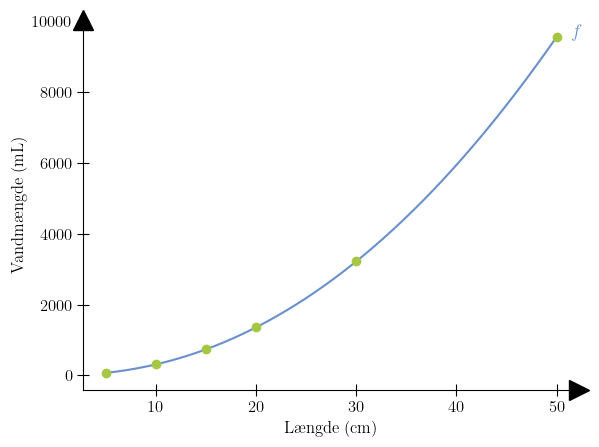

In [20]:
# Data med tydeligere eksponentiel vækst
df = pd.DataFrame({
    'Længde': [5, 10, 15, 20, 30, 50],
    'Vandmængde': [71, 308, 736, 1360, 3224, 9557]
})

# Beregn eksponentiel regression: y = b * a^x
x = df['Længde']
y = df['Vandmængde']
log_x = np.log(x)  
log_y = np.log(y)  
coefficients = np.polyfit(log_x, log_y, 1)  # Fitter en lineær model på log-transformerede data
a = coefficients[0]  # Omregn hældningen til a
b = np.exp(coefficients[1])  # Omregn skæringspunktet til b

# Fit funktion: y = b * a^x
x_cont = np.arange(5, 50.1, 0.1)
fitted_y = b * x_cont**a

# Initialize plot mimicking manim/TikZ
# Enable LaTeX for all text
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Create figure
fig, ax = plt.subplots()

# Ensure axes and gridlines are in the background
ax.set_axisbelow(True)
ax.spines['left'].set_zorder(0)  # Place y-axis spine in the background
ax.spines['bottom'].set_zorder(0)  # Place x-axis spine in the background

# Original scale plot
ax.scatter(x=df['Længde'], y=df['Vandmængde'], color='#a5c743', zorder=2)
ax.plot(x_cont, fitted_y, color='#6a90cc', zorder=1)

# Add 'f' annotation at the end of the fitted curve
ax.annotate(
    r"$f$",  # Label
    xy=(x.iloc[-1], fitted_y[-1]),  # Position: last x and fitted y
    xytext=(10,0),  # Offset for the text
    textcoords='offset points',
    color='#6a90cc',
    fontsize=14
)

ax.spines[['top', 'right']].set_visible(False)
ax.plot(1, 0, ">k", transform=ax.transAxes, clip_on=False, markersize=15)
ax.plot(0, 1, "^k", transform=ax.transAxes, clip_on=False, markersize=15)
#ax.spines[['left']].set_position('zero')
ax.tick_params(direction='inout', length=8, labelsize=12)
ax.set_xlabel('Længde (cm)', fontsize=12)
ax.set_ylabel('Vandmængde (mL)', fontsize=12)

# Adjust layout
#plt.tight_layout()

# Glue figure for myst_nb
glue('eks2-2', fig, display=False)
